In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
raw_df = pd.read_csv('chicago.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 6523 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20201220034219,2020-12-20,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, Illinois, United States",Hyde Park,NaN,41.78790,-87.58780,Private room in condominium,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Essentials"", ""Hot water"", ""Smoke alarm"", ""Wi...",$70.00,2,29,2,2,29,29,2.0,29.0,NaN,t,0,0,0,0,2020-12-20,181,3,0,2015-01-09,2020-10-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,R17000015609,f,1,0,1,0,2.50
1,4505,https://www.airbnb.com/rooms/4505,20201220034219,2020-12-20,394 Great Reviews. 127 y/o House. 40 yds to tr...,We have been closed for quite a while and will...,NaN,https://a0.muscache.com/pictures/10628083/3543...,5775,https://www.airbnb.com/users/show/5775,Craig & Kathleen,2008-12-29,"Chicago, Illinois, United States",Incredibly creative(Kathleen) and stunningly a...,NaN,NaN,93%,t,https://a0.muscache.com/im/users/5775/profile_...,https://a0.muscache.com/im/users/5775/profile_...,Little Village,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,NaN,South Lawndale,NaN,41.85495,-87.69696,Entire apartment,Entire home/apt,7,NaN,1 bath,3.0,5.0,"[""Air conditioning"", ""Barbecue utensils"", ""Ess...",$95.00,2,60,2,2,60,60,2.0,60.0,NaN,t,0,0,0,170,2020-12-20,395,5,0,2009-03-06,2020-07-14,96.0,10.0,9.0,10.0,10.0,10.0,9.0,R19000037538,t,1,1,0,0,2.75
2,7126,https://www.airbnb.com/rooms/7126,20201220034219,2020-12-21,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,Sarah,2009-05-19,"Chicago, Illinois, United States",We live in Chicago. We love to travel and see ...,within an hour,100%,97%,t,https://a0.muscache.com/im/users/17928/profile...,https://a0.muscache.com/im/users/17928/profile...,Ukrainian Village,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Chicago, Illinois, United States",West Town,NaN,41.90289,-87.68182,Entire apartment,Entire home/apt,2,NaN,1 bath,3.0,4.0,"[""Bathtub"", ""Lockbox"", ""Refrigerator"", ""Privat...",$60.00,2,60,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,0,2020-12-21,387,14,0,2009-0

In [ ]:
# Dropping initial columns
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'license'], axis=1, inplace=True)
df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

# Several columns only contain one category and can be dropped:
df.drop(['has_availability', 'host_has_profile_pic', 'bathrooms'], axis=1, inplace=True)

# Drop somemore useless shit - Only one will be retained - for 90 days
df.drop('calendar_updated', axis=1, inplace=True)
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

# These will be highly correlated with number_of_reviews and so will be dropped.
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month'], axis=1, inplace=True)

# Let's ignore the effects of neighbourhood first, so let's drop those columns for now
df.drop(['neighbourhood', 'neighbourhood_cleansed'], axis=1, inplace=True)

# Drop some other bullshits
df.drop(['bathrooms_text'], axis=1, inplace=True)

df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2384,2008-08-29,within an hour,100%,t,1,t,41.78790,-87.58780,Private room in condominium,Private room,1,1.0,1.0,"[""Essentials"", ""Hot water"", ""Smoke alarm"", ""Wi...",$70.00,2,29,0,181,2015-01-09,2020-10-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4505,2008-12-29,NaN,NaN,t,1,t,41.85495,-87.69696,Entire apartment,Entire home/apt,7,3.0,5.0,"[""Air conditioning"", ""Barbecue utensils"", ""Ess...",$95.00,2,60,0,395,2009-03-06,2020-07-14,96.0,10.0,9.0,10.0,10.0,10.0,9.0,t
7126,2009-05-19,within an hour,100%,t,2,t,41.90289,-87.68182,Entire apartment,Entire home/apt,2,3.0,4.0,"[""Bathtub"", ""Lockbox"", ""Refrigerator"", ""Privat...",$60.00,2,60,0,387,2009-07-03,2020-11-16,93.0,10.0,9.0,10.0,10.0,10.0,10.0,f


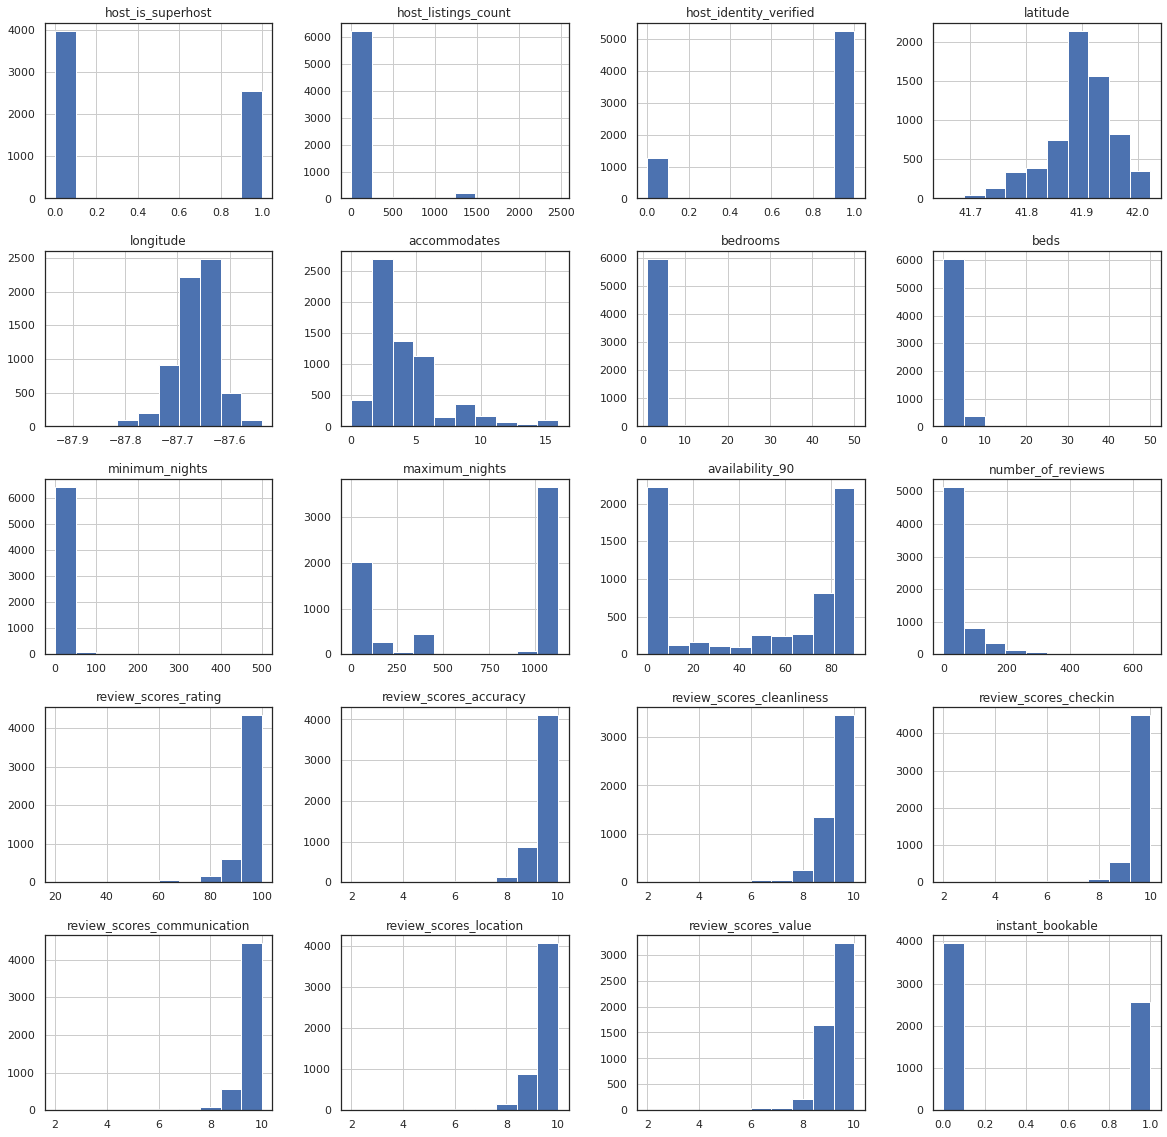

In [ ]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

Cleaning individual columns

In [ ]:
# host_since
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2020, 12, 20) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1733.0
Median days as host: 1739.0


In [ ]:
# host_response_time

print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
print(len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2]))

Null values: 1497
Proportion: 22.9%
279


In [ ]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.571669
unknown               0.229496
within a few hours    0.099647
within a day          0.074506
a few days or more    0.024682
Name: host_response_time, dtype: float64

In [ ]:
# host_response_rate
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 1497
Proportion: 22.9%


In [ ]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 76.6%


100%       3851
unknown    1497
50-89%      510
90-99%      450
0-49%       215
Name: host_response_rate, dtype: int64

In [ ]:
# property_type
# Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories 'apartment', 'house' and 'other' will be used, as most properties can be classified as either apartments or houses.
df.property_type.value_counts()

Entire apartment                      2860
Private room in apartment              746
Entire condominium                     664
Private room in house                  487
Entire house                           387
Private room in condominium            280
Entire guest suite                     167
Entire loft                            138
Entire serviced apartment              125
Room in boutique hotel                 118
Entire townhouse                        95
Private room in townhouse               72
Shared room in apartment                46
Private room in bungalow                45
Private room in loft                    40
Entire guesthouse                       37
Room in hotel                           30
Private room in guest suite             26
Shared room in house                    22
Entire bungalow                         21
Shared room in condominium              16
Private room in bed and breakfast       14
Room in serviced apartment              13
Room in bed

In [ ]:
# Cleaning property_type
# three types: House, Apartment, and Hotel
df.property_type.replace({
    'Entire house': 'House',
    'Private room in house': 'House',
    'Entire townhouse': 'House',
    'Private room in townhouse': 'House',
    'Entire guesthouse': 'House',
    'Shared room in house': 'House',
    'Private room in guesthouse': 'House',
    'Tiny house': 'House',
    'Private room in tiny house': 'House',
    'Earth house': 'House',
    'Entire villa': 'House',
    'Private room in villa': 'House',
    'Private room in cottage': 'House',
    'Entire cottage': 'House',
    'Entire bungalow': 'House',
    'Private room in bungalow': 'House',
    'Shared room in bungalow': 'House',
    'Private room in farm stay': 'House',
    'Entire home/apt': 'House',
    
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Shared room in apartment': 'Apartment',
    'Room in serviced apartment': 'Apartment',
    'Private room in serviced apartment': 'Apartment',
    'Shared room in serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Private room in loft': 'Apartment',
    'Shared room in loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Private room in condominium': 'Apartment',
    'Shared room in condominium': 'Apartment',
    'Entire apartment': 'Apartment', 
    'Private room in bed and breakfast': 'Apartment',
    'Private room in bed and breakfast': 'Apartment',
    
    'Room in boutique hotel': 'Hotel',
    'Room in hotel': 'Hotel',
    'Room in aparthotel': 'Hotel',
    'Room in hostel': 'Hotel',
    'Shared room in hostel': 'Hotel',
    'Private room in guest suite': 'Hotel',
    'Entire guest suite': 'Hotel'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'

In [ ]:
df.room_type.value_counts()

Entire home/apt    4510
Private room       1848
Shared room          94
Hotel room           71
Name: room_type, dtype: int64

In [ ]:
df.property_type.isna().count()

6523

In [ ]:
# bathrooms, bedrooms and beds
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Amenities
df.amenities[:1].values

array(['["Essentials", "Hot water", "Smoke alarm", "Wifi", "Cooking basics", "Refrigerator", "Piano", "Stove", "Conditioner", "Dedicated workspace", "Kitchen", "Fire extinguisher", "Carbon monoxide alarm", "Hangers", "Iron", "Dishes and silverware", "Washer", "Long term stays allowed", "Body soap", "Paid parking on premises", "Extra pillows and blankets", "Bed linens", "Hair dryer", "Cleaning before checkout", "Coffee maker", "Shower gel", "Shampoo", "First aid kit", "Dryer", "Host greets you", "TV", "Microwave", "Free street parking", "Heating"]'],
      dtype=object)

In [ ]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities.values)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '120\\ HDTV with Netflix',
 '2 JBL Speakers sound system with Bluetooth and aux',
 '24-hour fitness center',
 '25\\ HDTV with Netflix',
 '26\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with HBO Max',
 '33\\ HDTV with Netflix',
 '36\\ HDTV',
 '40\\ HDTV',
 '40\\ HDTV with Netflix',
 '42\\ HDTV',
 '42\\ HDTV with Netflix',
 '42\\ HDTV with premium cable',
 '43\\ HDTV with Netflix',
 '45\\ HDTV',
 '50\\ HDTV with Amazon Prime Video',
 '50\\ HDTV with Netflix',
 '50\\ HDTV with premium cable',
 '50\\ TV',
 '55\\ HDTV with Amazon Prime Video',
 '55\\ HDTV with Netflix',
 '55\\ TV',
 '56\\ HDTV with Amazon Prime Video',
 '65\\ HDTV',
 '65\\ HDTV with premium cable',
 'Air conditioning',
 'Alexa body soap',
 'Amana refrigerator',
 'Amazon Alexa Echo Dot Bluetooth sound system',
 'Amazon Echo Dot Bluetooth sound system',
 'Amazon Prime Video',
 'Aveeno body soap',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Baby safety gates',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecu

In [ ]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df.iloc[:,29]

id
2384        4496.0
4505        4374.0
7126        4233.0
9811        4139.0
10610       4509.0
             ...  
47126307    2901.0
47126361       1.0
47137445     952.0
47140245    3920.0
47141177    2763.0
Name: host_days_active, Length: 6523, dtype: float64

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,29:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,29:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'nature_and_views', 'child_friendly', 'host_greeting', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


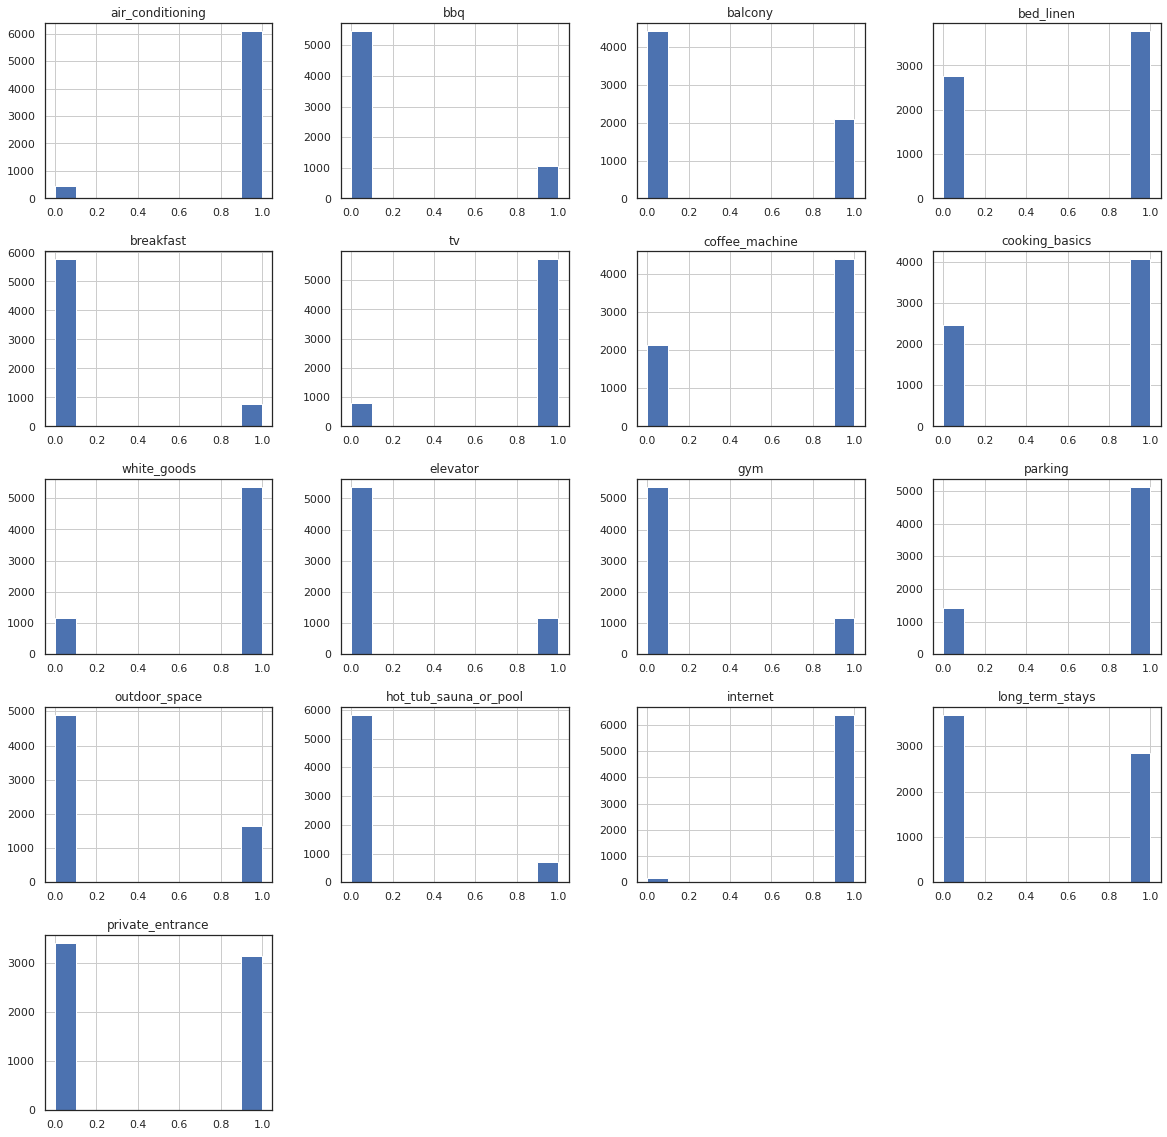

In [ ]:
# Amenities graph
df.iloc[:,29:].hist(figsize=(20,20));

In [ ]:
for col in df.iloc[:,29:].columns:
    print("Proportion without", col,":",round((len(df[df[col]==0])/len(df))*100,1),"%")

Proportion without air_conditioning : 6.8 %
Proportion without bbq : 83.6 %
Proportion without balcony : 67.7 %
Proportion without bed_linen : 42.3 %
Proportion without breakfast : 88.3 %
Proportion without tv : 12.5 %
Proportion without coffee_machine : 32.8 %
Proportion without cooking_basics : 37.7 %
Proportion without white_goods : 18.0 %
Proportion without elevator : 82.1 %
Proportion without gym : 82.0 %
Proportion without parking : 21.7 %
Proportion without outdoor_space : 74.8 %
Proportion without hot_tub_sauna_or_pool : 89.0 %
Proportion without internet : 2.5 %
Proportion without long_term_stays : 56.4 %
Proportion without private_entrance : 52.0 %


In [ ]:
# price
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [ ]:
df.availability_90.describe()

count    6523.000000
mean       48.268588
std        38.574773
min         0.000000
25%         0.000000
50%        64.000000
75%        87.000000
max        90.000000
Name: availability_90, dtype: float64

Null values in 'first_review': 19.7%
Null values in 'review_scores_rating': 20.4%


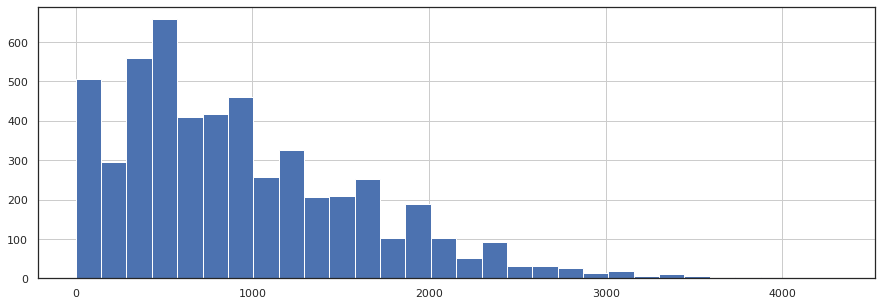

In [ ]:
# first_review and last_review

# About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.
# This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2020, 12, 20) - df.first_review).astype('timedelta64[D]')

# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [ ]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

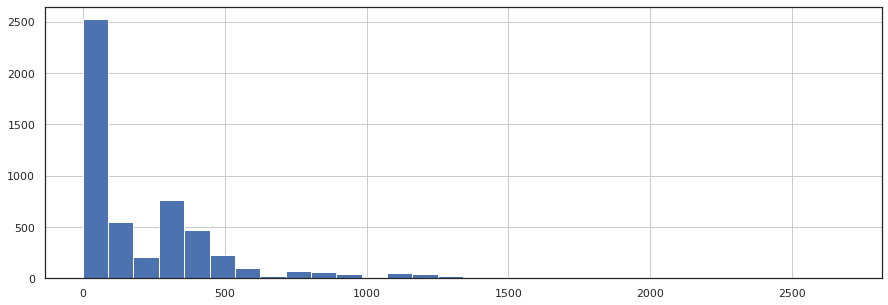

In [ ]:
# The same process will be followed for last_review:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2020, 12, 20) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

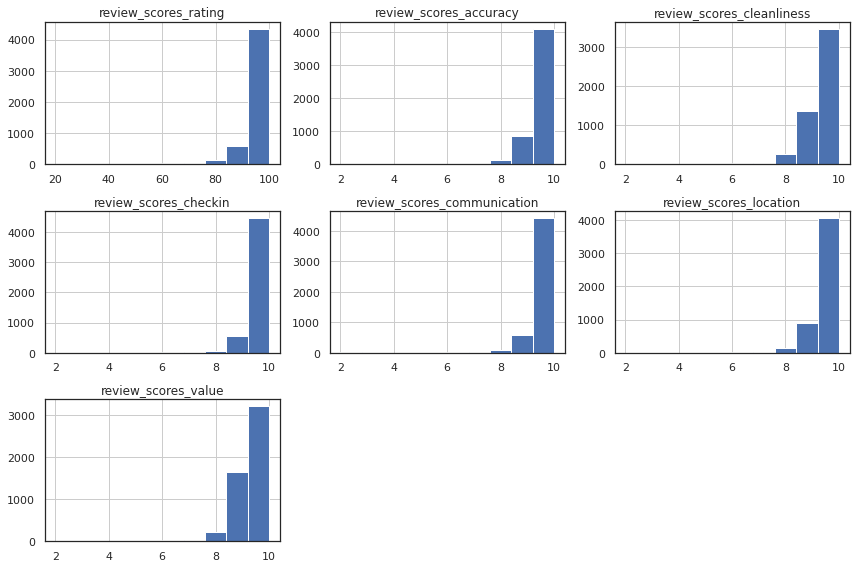

In [ ]:
# Review ratings columns

# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 5, 8, 9, 10],
               labels=['0-5/10','8/10', '9/10', '10/10'],
               na_label='no reviews')
    
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [ ]:
df.head(3)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2384,2008-08-29,within an hour,100%,1,1,1,41.78790,-87.58780,Apartment,Private room,1,1.0,1.0,70,2,29,0,181,2015-01-09,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,4496.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4+ years,2-8 weeks
4505,2008-12-29,unknown,unknown,1,1,1,41.85495,-87.69696,Apartment,Entire home/apt,7,3.0,5.0,95,2,60,0,395,2009-03-06,95-100/100,10/10,9/10,10/10,10/10,10/10,9/10,1,4374.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4+ years,2-6 months
7126,2009-05-19,within an hour,100%,1,2,1,41.90289,-87.68182,Apartment,Entire home/apt,2,3.0,4.0,60,2,60,0,387,2009-07-03,80-94/100,10/10,9/10,10/10,10/10,10/10,10/10,0,4233.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4+ years,2-8 weeks


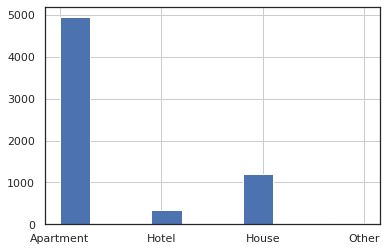

In [ ]:
# Property type graph
df.property_type.hist();

In [ ]:
df[df.isna().any(axis=1)]

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
789429,2011-09-20,unknown,unknown,0,3,1,41.961930,-87.662380,Apartment,Private room,2,1.0,1.0,99,365,365,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,3379.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nan,nan
1755737,2013-10-04,unknown,unknown,0,0,1,41.940360,-87.640680,Apartment,Entire home/apt,2,2.0,2.0,155,365,730,88,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,2634.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,nan,nan
1769731,2013-10-08,unknown,unknown,0,0,0,41.947470,-87.654170,Apartment,Entire home/apt,4,1.0,2.0,279,2,30,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,2630.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,nan,nan
1773021,2013-10-08,unknown,unknown,0,0,0,41.947740,-87.654210,Apartment,Entire home/apt,9,4.0,5.0,479,2,30,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,2630.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nan,nan
1773025,2013-10-08,unknown,unknown,0,0,0,41.947500,-87.654200,Apartment,Entire home/apt,9,4.0,5.0,479,2,30,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,2630.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47126307,2013-01-10,unknown,unknown,0,1,1,41.904030,-87.716110,House,Entire home/apt,5,3.0,3.0,180,4,1125,78,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,2901.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,nan,nan
47126361,2020-12-19,unknown,unknown,0,0,1,41.879120,-87.681380,Apartment,Private room,2,1.0,1.0,21,1,1125,87,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,nan,nan
47137445,2018-05-13,unknown,unknown,0,0,0,41.900750,-87.664920,Apartment,Entire home/apt,8,3.0,3.0,115,10,1125,14,0,NaT,nan,nan,nan,nan,nan,nan,nan,1,952.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,nan,nan


In [ ]:
df.fillna(value="unknown", inplace=True)

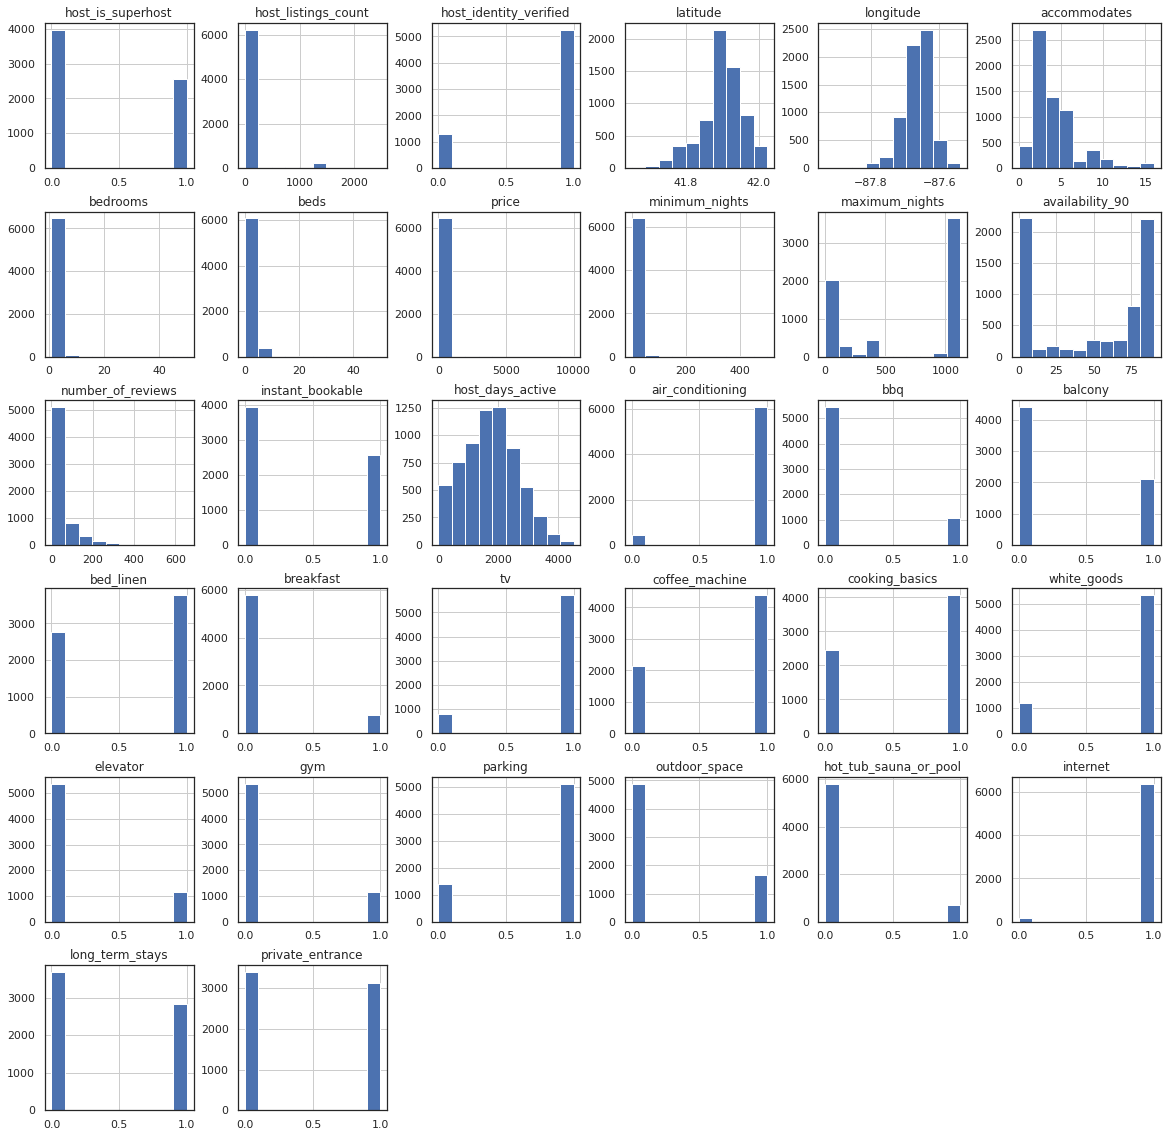

In [ ]:
df.hist(figsize=(20,20));

In [ ]:
# Drop host_since and first_review, we don't need these two anymore
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [ ]:
# Convert catogorical data with one-hot encoding
transformed_df = pd.get_dummies(df)

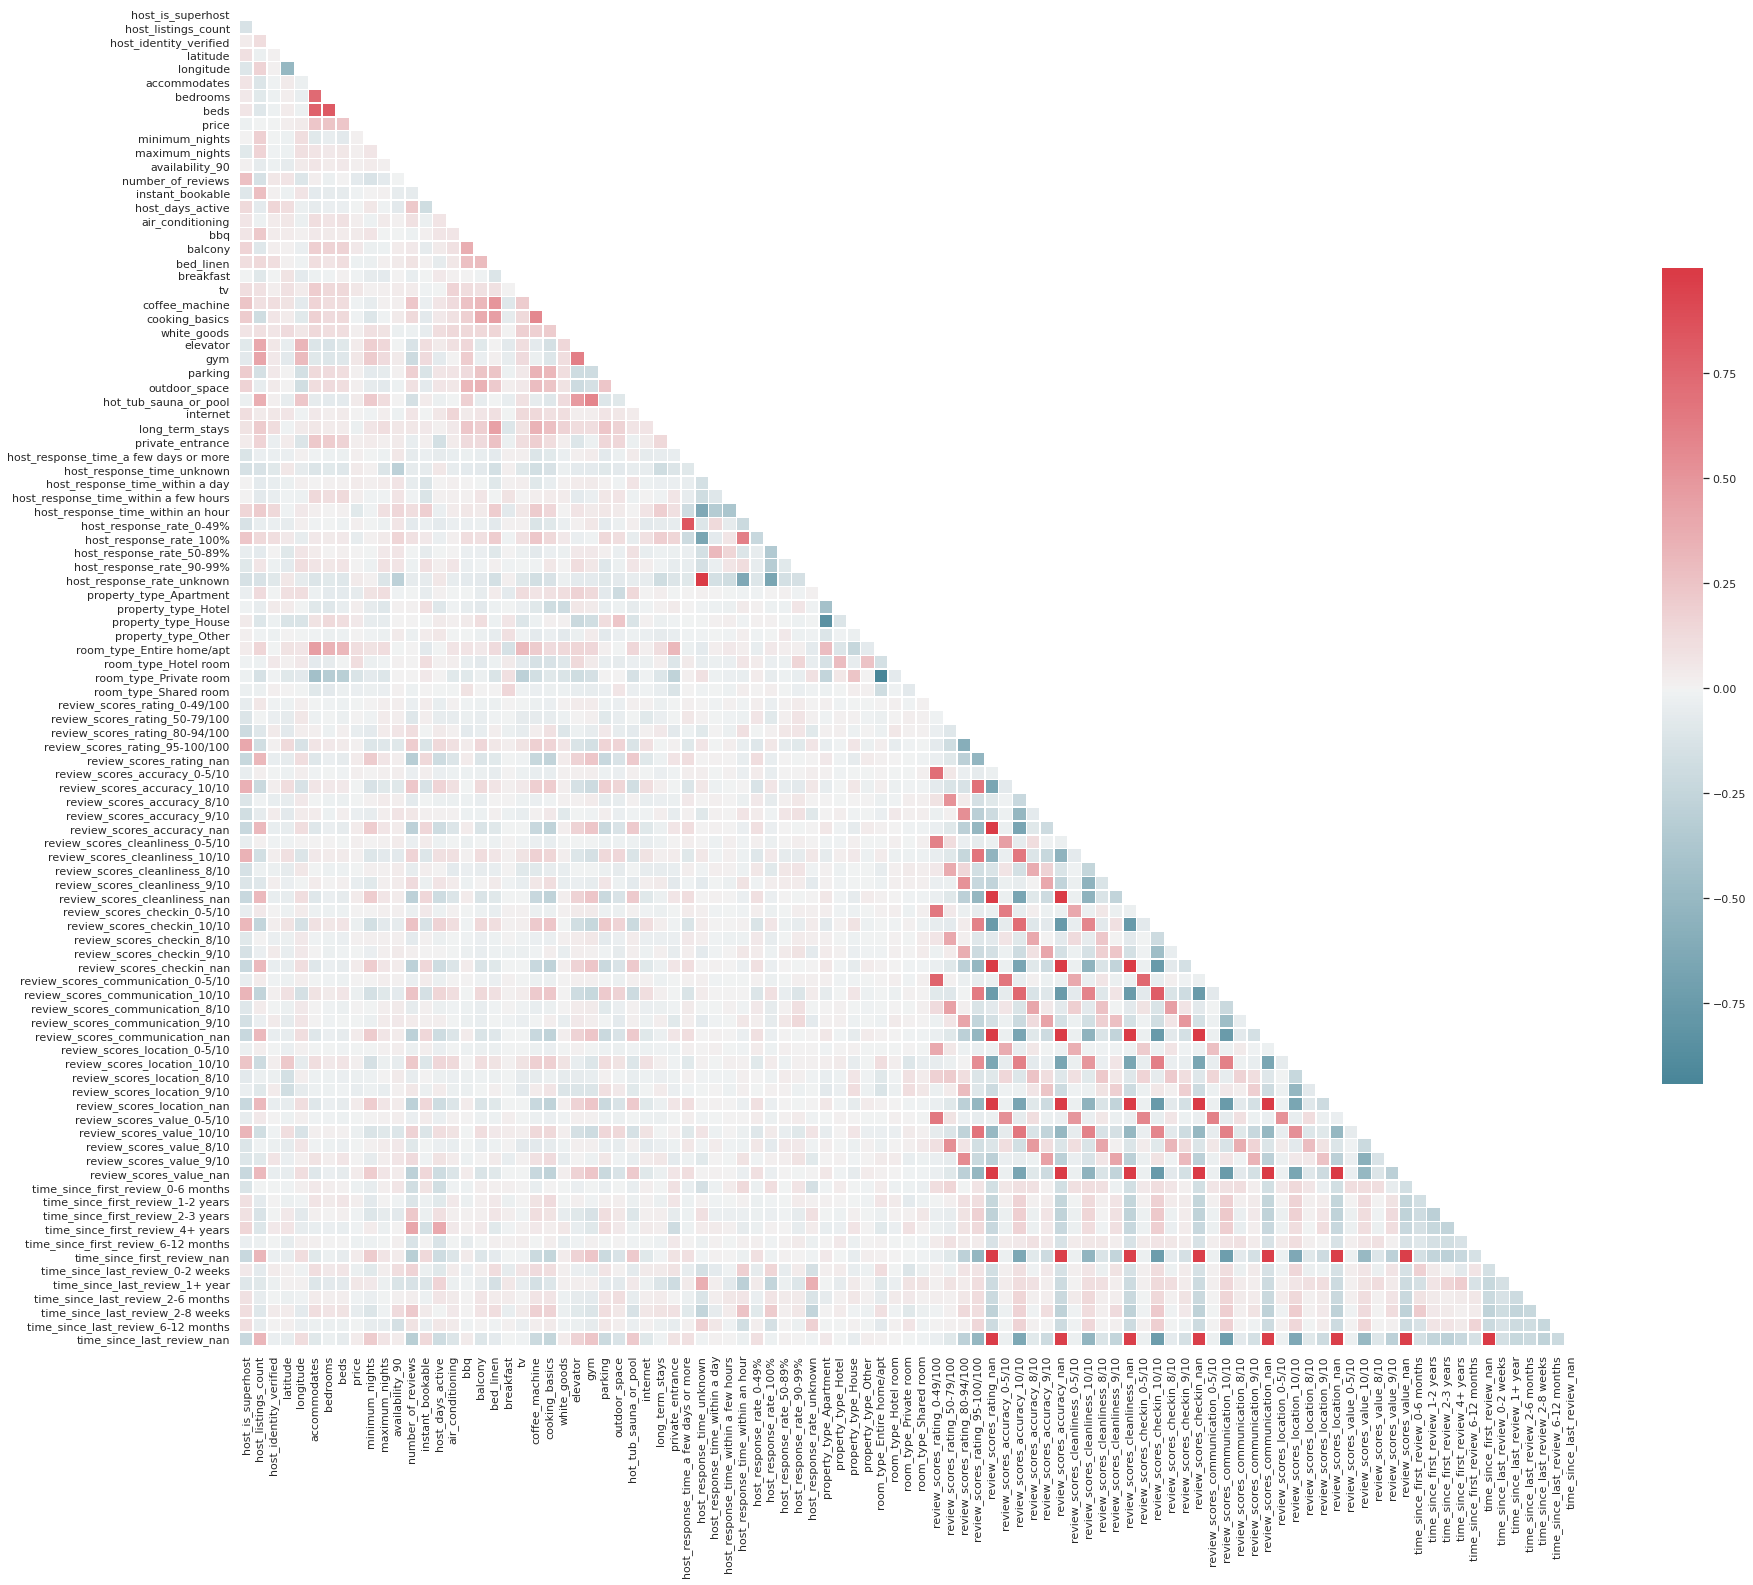

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());
    
multi_collinearity_heatmap(transformed_df, figsize=(30,30))

In [ ]:
# Drop price outliers
transformed_df.drop(transformed_df[transformed_df.price>(transformed_df.price.mean()+3*transformed_df.price.std())].index,inplace=True)

# Drop prices that seems like per-person prices instead of one-nice price
transformed_df.drop(transformed_df[transformed_df.price/transformed_df.accommodates<12].index,inplace=True)

In [ ]:
transformed_df

,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,air_conditioning,bbq,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,...,review_scores_cleanliness_0-5/10,review_scores_cleanliness_10/10,review_scores_cleanliness_8/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_checkin_0-5/10,review_scores_checkin_10/10,review_scores_checkin_8/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_communication_0-5/10,review_scores_communication_10/10,review_scores_communication_8/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_0-5/10,review_scores_location_10/10,review_scores_location_8/10,review_scores_location_9/10,review_scores_location_nan,review_scores_value_0-5/10,review_scores_value_10/10,review_scores_value_8/10,review_scores_value_9/10,review_scores_value_nan,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_first_review_nan,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,time_since_last_review_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2384,1,1,1,41.78790,-87.58780,1,1.0,1.0,70,2,29,0,181,0,4496.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4505,1,1,1,41.85495,-87.69696,7,3.0,5.0,95,2,60,0,395,1,4374.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
7126,1,2,1,41.90289,-87.68182,2,3.0,4.0,60,2,60,0,387,0,4233.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9811,1,10,1,41.91769,-87.63788,4,1.0,2.0,65,4,180,33,53,0,4139.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
10945,1,10,1,41.91183,-87.64000,4,2.0,2.0,116,4,180,26,21,1,4139.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47099705,0,18,0,41.89110,-87.67082,2,1.0,1.0,39,3,1125,64,0,1,971.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
47115140,0,1,1,41.77694,-87.60880,4,2.0,2.0,63,2,365,76,0,1,2139.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
47121422,0,2,1,41.94988,-87.66729,3,2.0,2.0,72,14,1125,56,0,0,2790.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
transformed_df.to_csv("chicago_cleaned.csv")

Standardising and normalising

In [ ]:
numerical_columns = ['accommodates', 'host_listings_count', 'latitude', 'longitude',
                     'bedrooms', 'beds', 'price', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'availability_90','host_days_active']

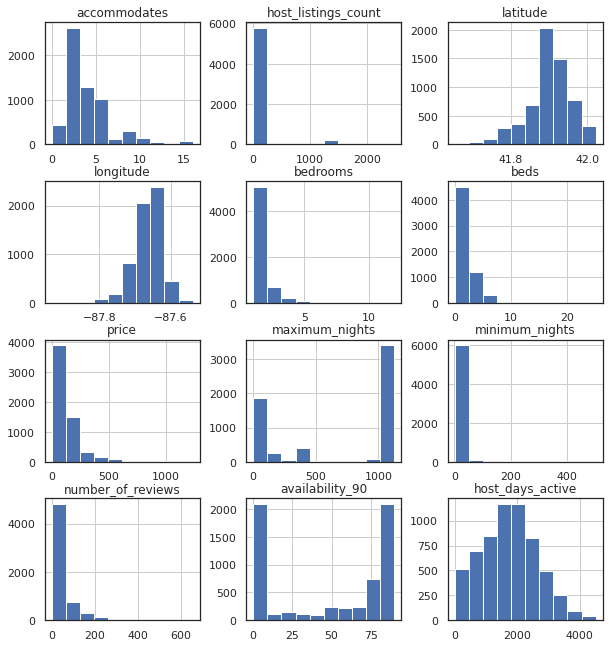

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(np.abs(transformed_df[col]))

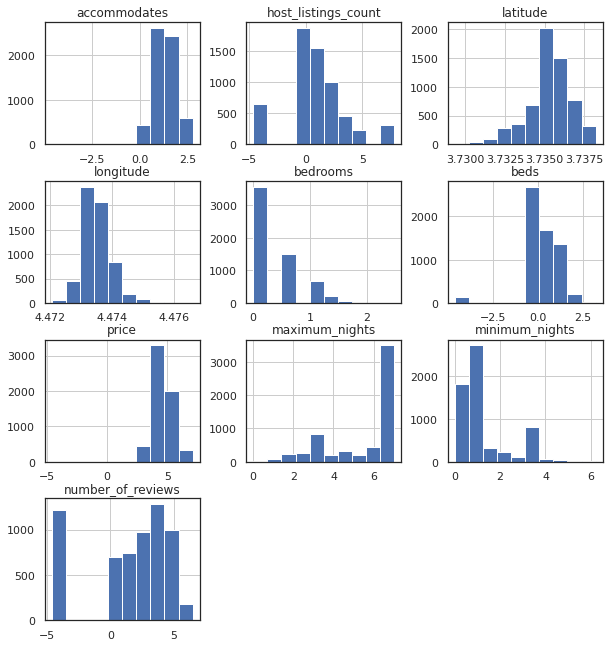

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
transformed_df.to_csv("chicago_cleaned2.csv")